CUSTOMER CHURN PREDICTION

Customer churn, defined as the rate at which customers stop doing business with an entity, is a significant concern. The ability to predict which customers are likely to churn enables organizations to take proactive measures to improve customer satisfaction and retention.

OBJECTIVE

1. To develop a machine learning model to predict customer churn for a technology organization. The model should identify customers who are at risk of leaving the service, allowing the company to implement targeted retention strategies.
2. Build a data driven strategy to better the solution for the organization

In [ ]:
import numpy as np
import seaborn as sns

from google.colab import files
uploaded=files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()
#no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
for feature in data.columns:
  print(feature,"=",len(data[feature].unique()))

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6531
Churn = 2


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for feature in data.columns:
  if data[feature].dtype=='object':
    data[feature]=encoder.fit_transform(data[feature])



In [ ]:
for feature in data.columns:
  print(feature,"=",len(data[feature].unique()))

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6531
Churn = 2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,6104,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1550,0
7,4770,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,2609,0
8,5604,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,2646,1
9,4534,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3022,0


In [ ]:
print("CUSTOMER CHURN COUNT=",data['Churn'].value_counts()[1])
print("CUSTOMER RETENTION COUNT=",data['Churn'].value_counts()[0])


CUSTOMER CHURN COUNT= 1869
CUSTOMER RETENTION COUNT= 5174


In [ ]:
data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
data.drop('customerID',axis=1,inplace=True)

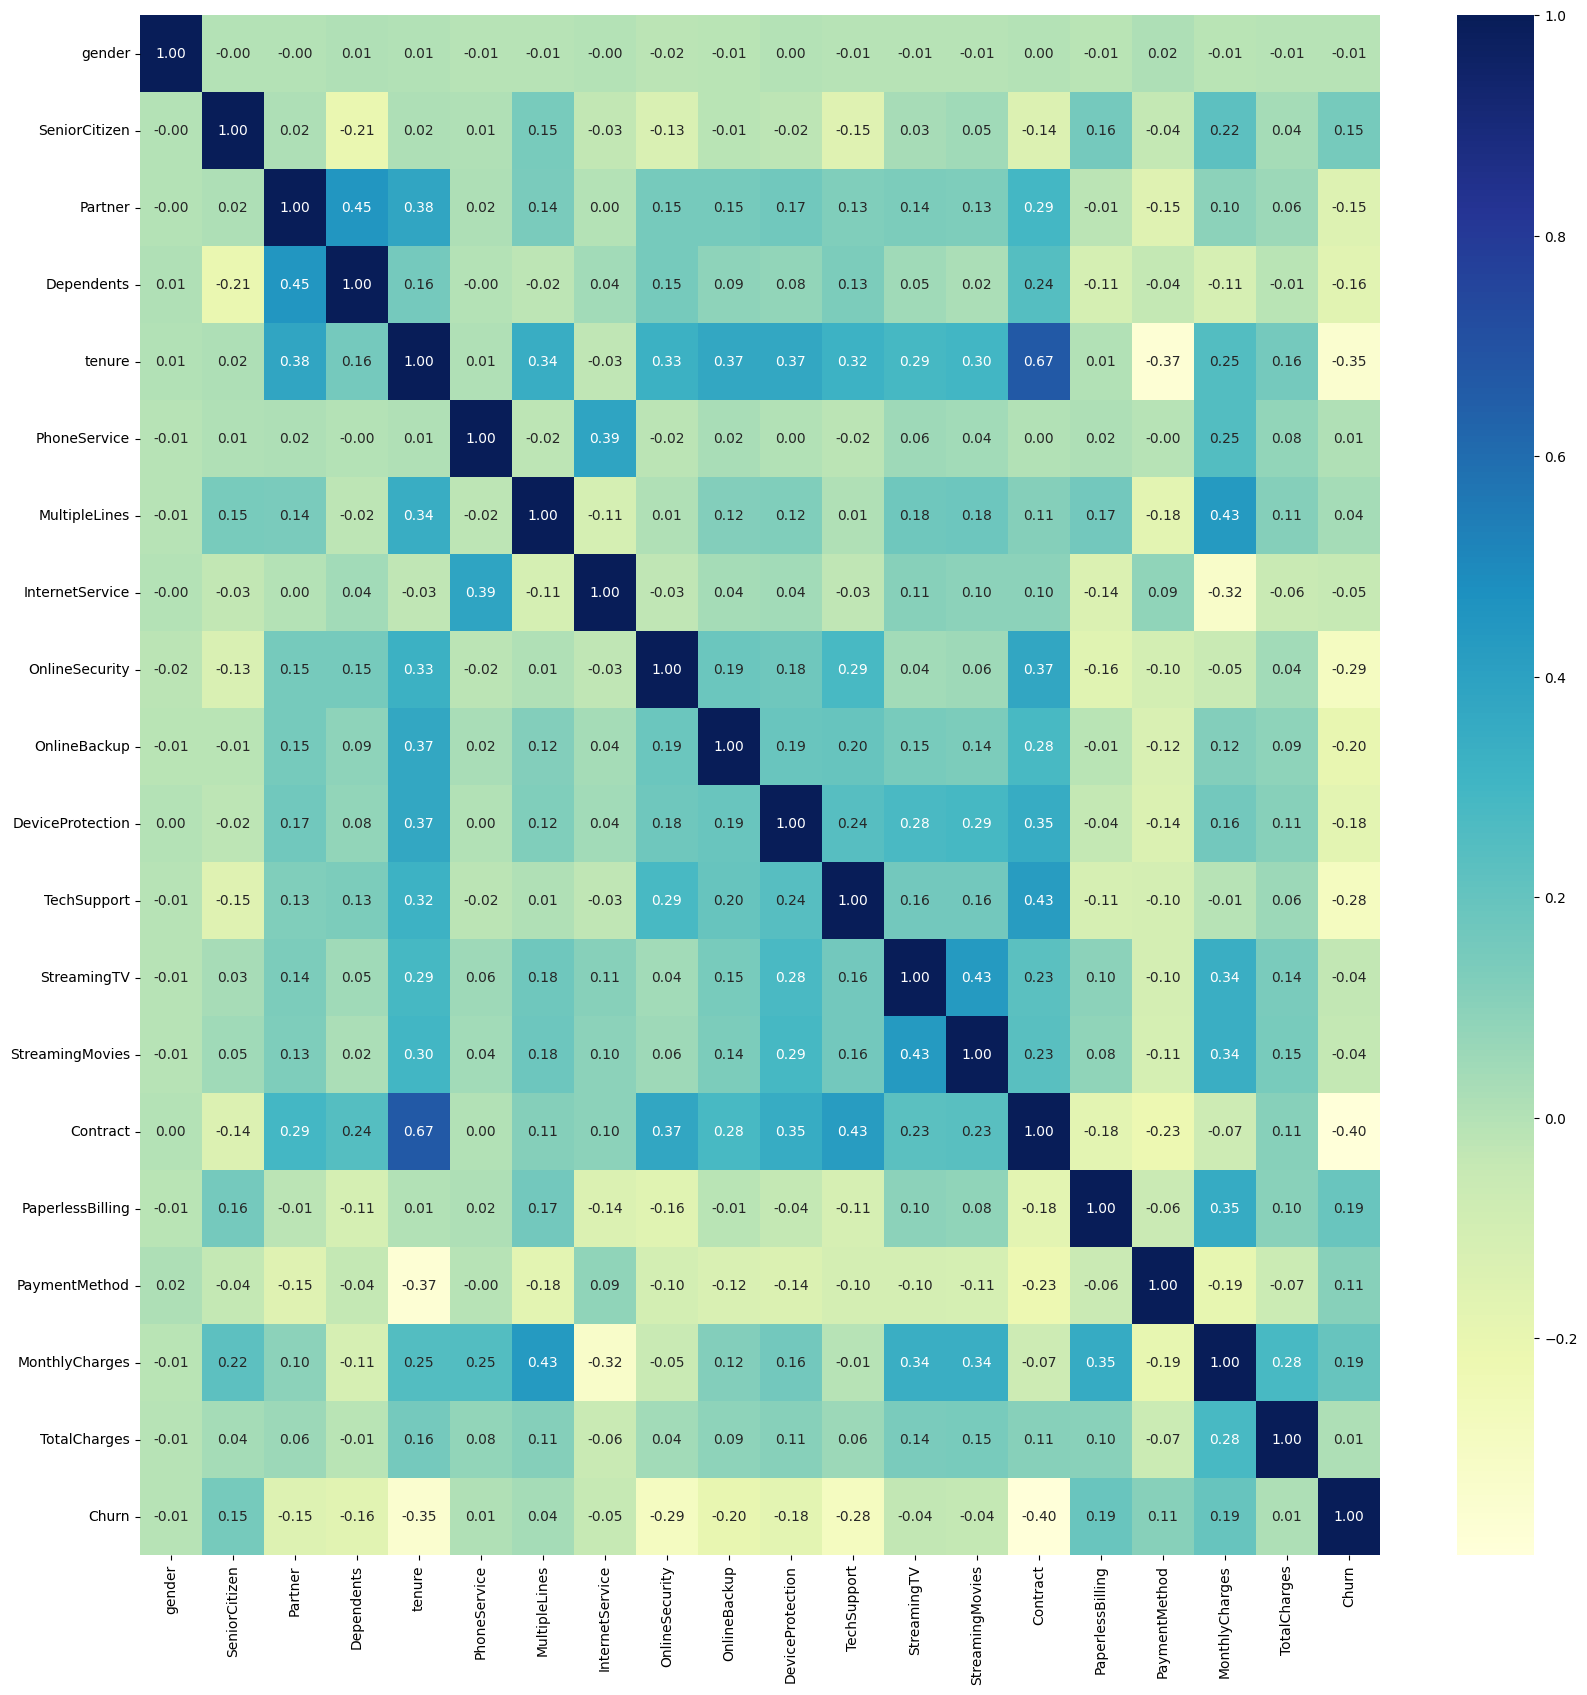

In [ ]:
#Correlation matrix

import matplotlib.pyplot as plt
corr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

There is no multicollinearity

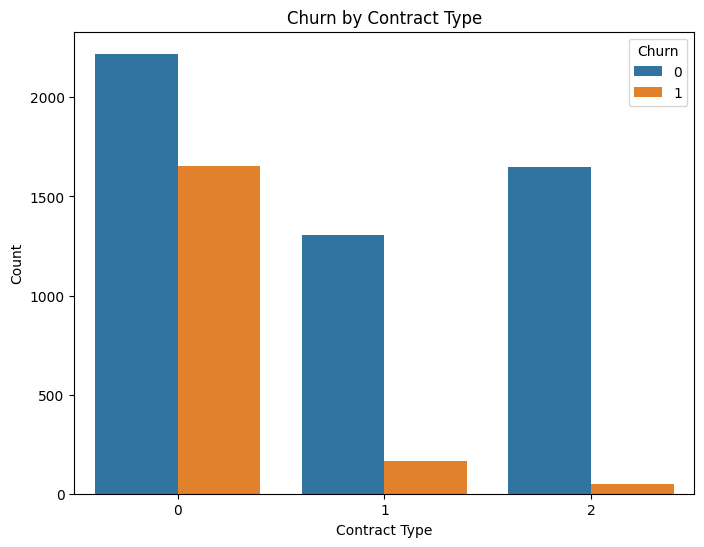

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

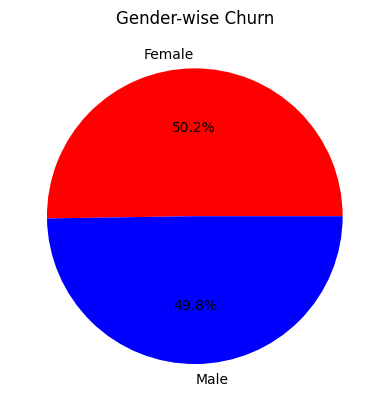

In [ ]:
# pie chart for gender wise churn

import matplotlib.pyplot as plt
churn_by_gender = data[data['Churn'] == 1].groupby('gender')['gender'].count()

labels = ['Female', 'Male']
colors = ['red', 'blue']

plt.pie(churn_by_gender, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title('Gender-wise Churn')
plt.show()


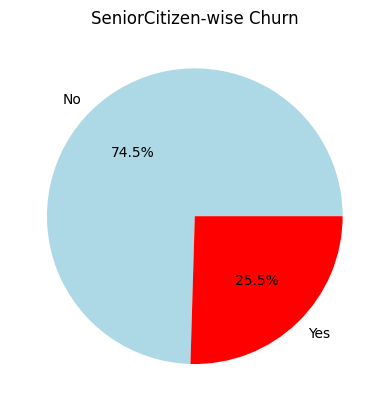

In [ ]:
# prompt: pie chart for SeniorCitizen churn

import matplotlib.pyplot as plt
churn_by_seniorcitizen = data[data['Churn'] == 1].groupby('SeniorCitizen')['SeniorCitizen'].count()

labels = ['No', 'Yes']
colors = ['lightblue', 'red']

plt.pie(churn_by_seniorcitizen, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title('SeniorCitizen-wise Churn')
plt.show()


<ipython-input-20-3e7d11ac93b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set1')


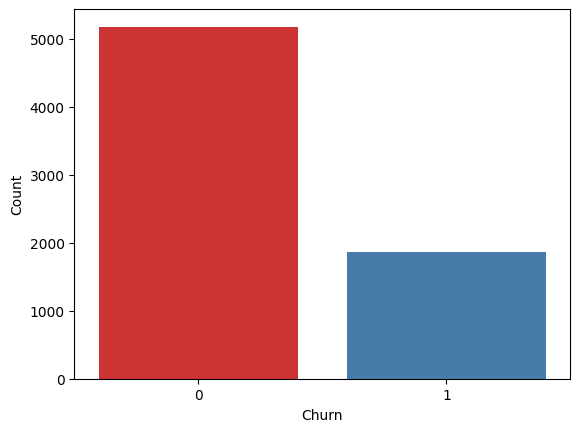

In [ ]:
#  bar chart representing the churns

sns.countplot(x='Churn', data=data, palette='Set1')


plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


<ipython-input-21-d5714b139215>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data.TotalCharges[(data["Churn"] == 0)],
<ipython-input-21-d5714b139215>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data.TotalCharges[(data["Churn"] == 1)],


Text(0.5, 1.0, 'Distribution of Total charges by churn')

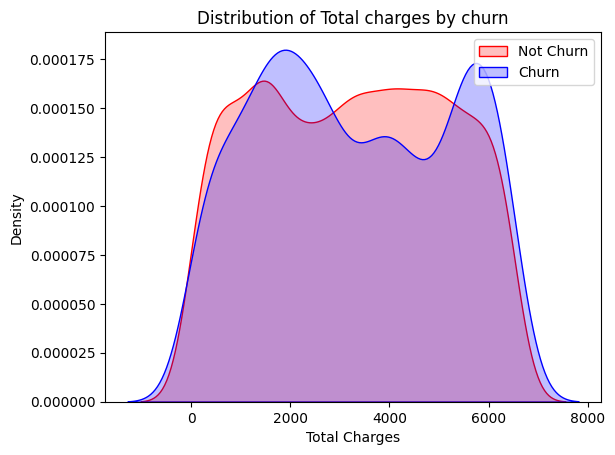

In [ ]:
tot=sns.kdeplot(data.TotalCharges[(data["Churn"] == 0)],
                color="Red", shade = True)
tot=sns.kdeplot(data.TotalCharges[(data["Churn"] == 1)],
                ax =tot, color="Blue", shade= True)
tot.legend(["Not Churn","Churn"],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Distribution of Total charges by churn')

<ipython-input-27-bd2269f3b046>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthchar=sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 0)],
<ipython-input-27-bd2269f3b046>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthchar=sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 1)],


Text(0.5, 1.0, 'Distribution of Monthly charges by churn')

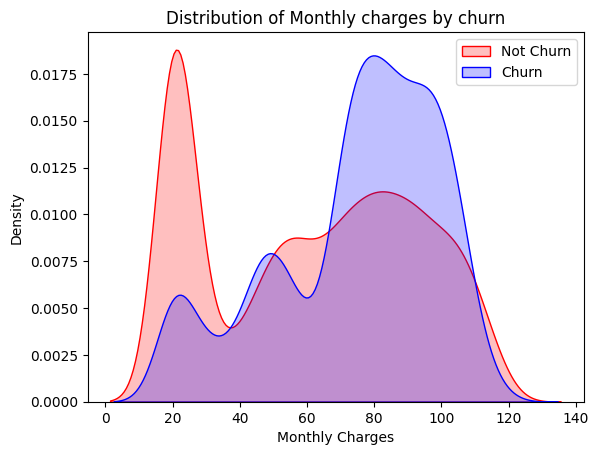

In [ ]:
monthchar=sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 0)],
                color="Red", shade = True)
monthchar=sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 1)],
                ax =monthchar, color="Blue", shade= True)
monthchar.legend(["Not Churn","Churn"],loc='upper right')
monthchar.set_ylabel('Density')
monthchar.set_xlabel('Monthly Charges')
monthchar.set_title('Distribution of Monthly charges by churn')

Churn is high when monthly charges are high

<Axes: >

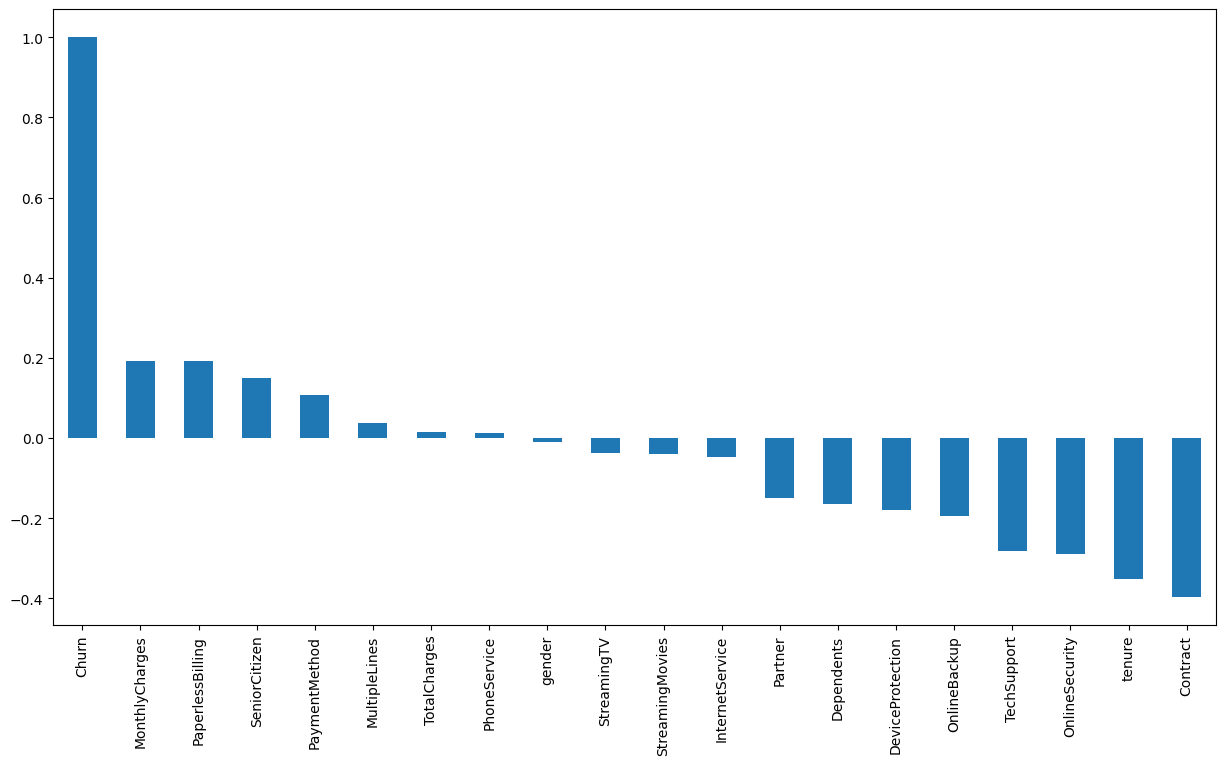

In [ ]:
#Chart showing the correlation of all the columns in the data , convys which column gives more insights about the dataset
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Churn: This is the target variable itself, so its correlation with itself is 1.

**Positive Correlation:** Features like MonthlyCharges, PaperlessBilling, and SeniorCitizen have a positive correlation with churn. This means that as these features increase, the likelihood of churn also tends to increase.(most important features)

**Negative Correlation:** Features like tenure, Contract, OnlineSecurity, and TechSupport have a negative correlation with churn. This suggests that as these features increase, the likelihood of churn tends to decrease.

**Near Zero Correlation:** Features with bars close to zero, such as gender, StreamingTV, and StreamingMovies, have little to no linear relationship with churn.

<Axes: xlabel='Churn', ylabel='count'>

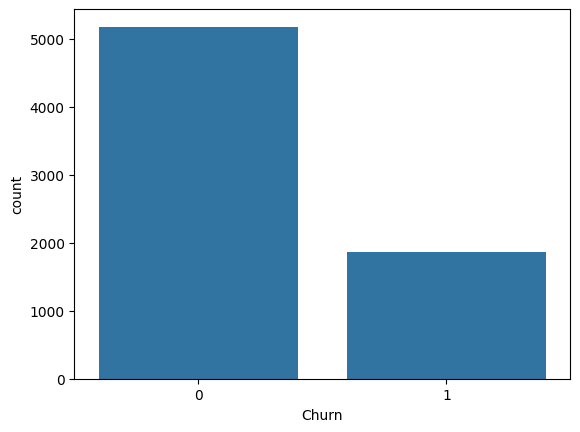

In [ ]:
#draw a graph to check if logistic regression is suitable forthe dataset
sns.countplot(x='Churn',data=data)


**MODEL BUILDING**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y=data['Churn']
y



0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
X=data.drop('Churn',axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [ ]:
pip install SMOTEENN()

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install SMOTEENN()'


In [ ]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X,y=sm.fit_resample(X,y)


In [ ]:
X.shape

(6138, 19)

In [ ]:
y.shape

(6138,)

In [ ]:
#SPLITTING
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9309182813816343


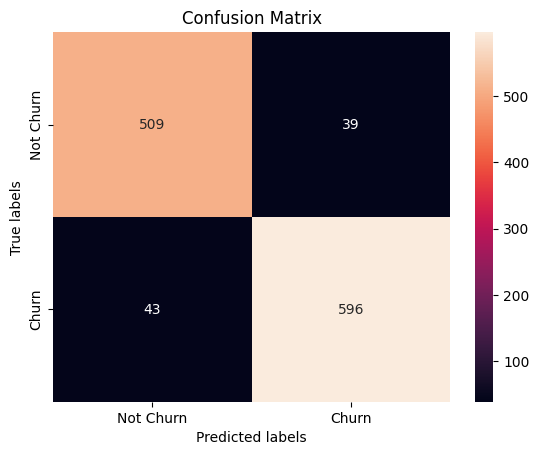

In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'])

# Display the plot
plt.show()


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       548
           1       0.93      0.94      0.93       639

    accuracy                           0.93      1187
   macro avg       0.93      0.93      0.93      1187
weighted avg       0.93      0.93      0.93      1187



In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.928390901432182


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


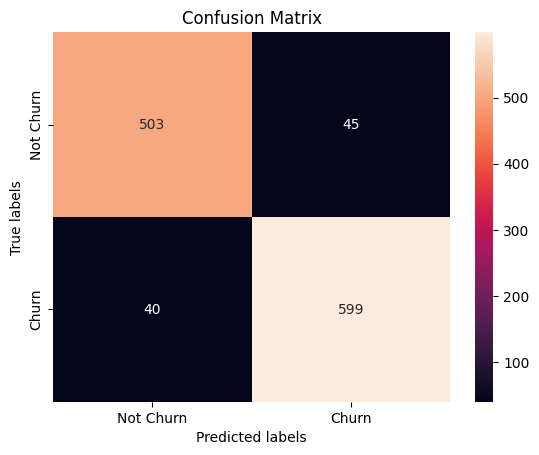

In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'])

# Display the plot
plt.show()


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       548
           1       0.93      0.94      0.93       639

    accuracy                           0.93      1187
   macro avg       0.93      0.93      0.93      1187
weighted avg       0.93      0.93      0.93      1187



RANDOM FOREST CLASSIFIER

In [ ]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9545071609098568


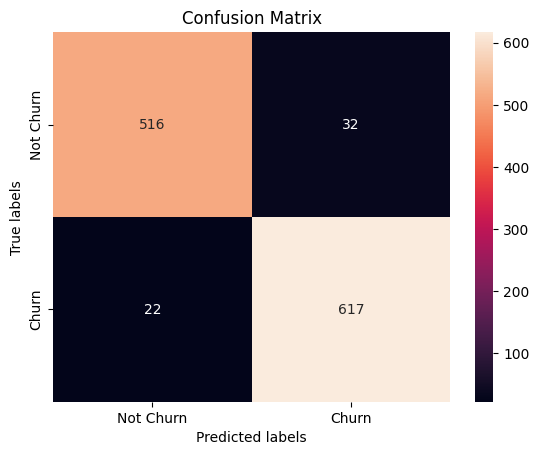

In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'])

# Display the plot
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       548
           1       0.95      0.97      0.96       639

    accuracy                           0.95      1187
   macro avg       0.95      0.95      0.95      1187
weighted avg       0.95      0.95      0.95      1187



Here, Random forest classifier , shows better accuracy ,precision,recall and f1 score than logistic regression and decision tree classifier

In [ ]:
#gradient booster method
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9477674810446504


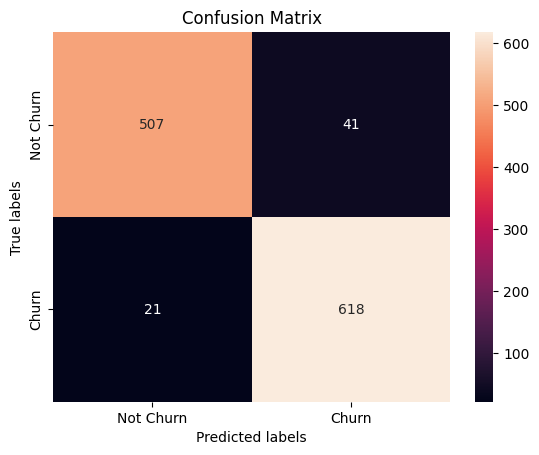

In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'])
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'])

# Display the plot
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       548
           1       0.94      0.97      0.95       639

    accuracy                           0.95      1187
   macro avg       0.95      0.95      0.95      1187
weighted avg       0.95      0.95      0.95      1187



Here the false positive is very high compared to the other method, in spite of high accuracy

In [ ]:
#therefore pickling random forest classifier
import pickle
pickle.dump(rf,open('model.pkl','wb'))
